# Objectives

* Identify keywords in course titles using a WordCloud
* Calculate the summary statistics and visualizations of the online course content dataset
* Determine popular course genres
* Calculate the summary statistics and create visualizations of the online course enrollment dataset
* Identify courses with the greatest number of enrolled students


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

/tmp/ipykernel_6606/77993529.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# also set a random state
rs = 45

### Load and explore the dataset

First, let's load the datasets as `Pandas` dataframes and start some basic exploratory data analysis tasks on them.

In [3]:
# Point to the datasets stored on the cloud
course_genre_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_genre.csv"
ratings_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/ratings.csv"

In [4]:
course_df = pd.read_csv(course_genre_url)
ratings_df = pd.read_csv(ratings_url)

In [5]:
course_df.columns

Index(['COURSE_ID', 'TITLE', 'Database', 'Python', 'CloudComputing',
       'DataAnalysis', 'Containers', 'MachineLearning', 'ComputerVision',
       'DataScience', 'BigData', 'Chatbot', 'R', 'BackendDev', 'FrontendDev',
       'Blockchain'],
      dtype='object')

In [6]:
course_df.shape[0]

307

In [7]:
course_df.head()

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,RP0105EN,analyzing big data in r using apache spark,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [8]:
course_df.dtypes

COURSE_ID          object
TITLE              object
Database            int64
Python              int64
CloudComputing      int64
DataAnalysis        int64
Containers          int64
MachineLearning     int64
ComputerVision      int64
DataScience         int64
BigData             int64
Chatbot             int64
R                   int64
BackendDev          int64
FrontendDev         int64
Blockchain          int64
dtype: object

In [9]:
course_df.iloc[1, ]

COURSE_ID                                     ML0122EN
TITLE              accelerating deep learning with gpu
Database                                             0
Python                                               1
CloudComputing                                       0
DataAnalysis                                         0
Containers                                           0
MachineLearning                                      1
ComputerVision                                       0
DataScience                                          1
BigData                                              0
Chatbot                                              0
R                                                    0
BackendDev                                           0
FrontendDev                                          0
Blockchain                                           0
Name: 1, dtype: object

Next, let's focus on the course title column by trying to determine keywords in the titles. Those keywords in the titles may give us a more intuitive summary of what kind of courses we have in the dataset.

### Plot a Word Cloud from Course Titles

First, let's join all the title values into one string, then we can conveniently get a wordcloud from the big string:


In [10]:
titles = " ".join(title for title in course_df['TITLE'].astype(str))
titles

'robots are coming  build iot apps with watson  swift  and node red accelerating deep learning with gpu consuming restful services using the reactive jax rs client analyzing big data in r using apache spark containerizing  packaging  and running a spring boot application cloud native security conference  data security data science bootcamp with r for university proffesors learn how to use docker containers for iterative development scorm test course create your first mongodb database testing microservices with the arquillian managed container cloud pak for integration essentials watson analytics for social media data science bootcamp with python for university professors  advance create a cryptocurrency trading algorithm in python data   ai essentials securing java microservices with eclipse microprofile json web token  microprofile jwt  enabling distributed tracing in microservices with zipkin sql access for hadoop ybrid cloud conference  ai pipelines lab dataops methodology data   ai

We also want to filter common stop words and some less meaningful words:


In [11]:
# English Stopwords
stopwords = set(STOPWORDS)
stopwords.update(["getting started", "using", "enabling", "template", "university", "end", "introduction", "basic"])

Then, we create a ```WordCloud``` object and generate ```wordcloud``` from the titles.


In [12]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400)

In [13]:
wordcloud.generate(titles)

We can use `plt.imshow()` method to visualize the generated wordcloud:

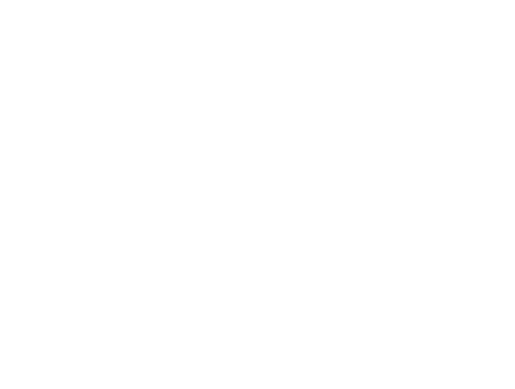

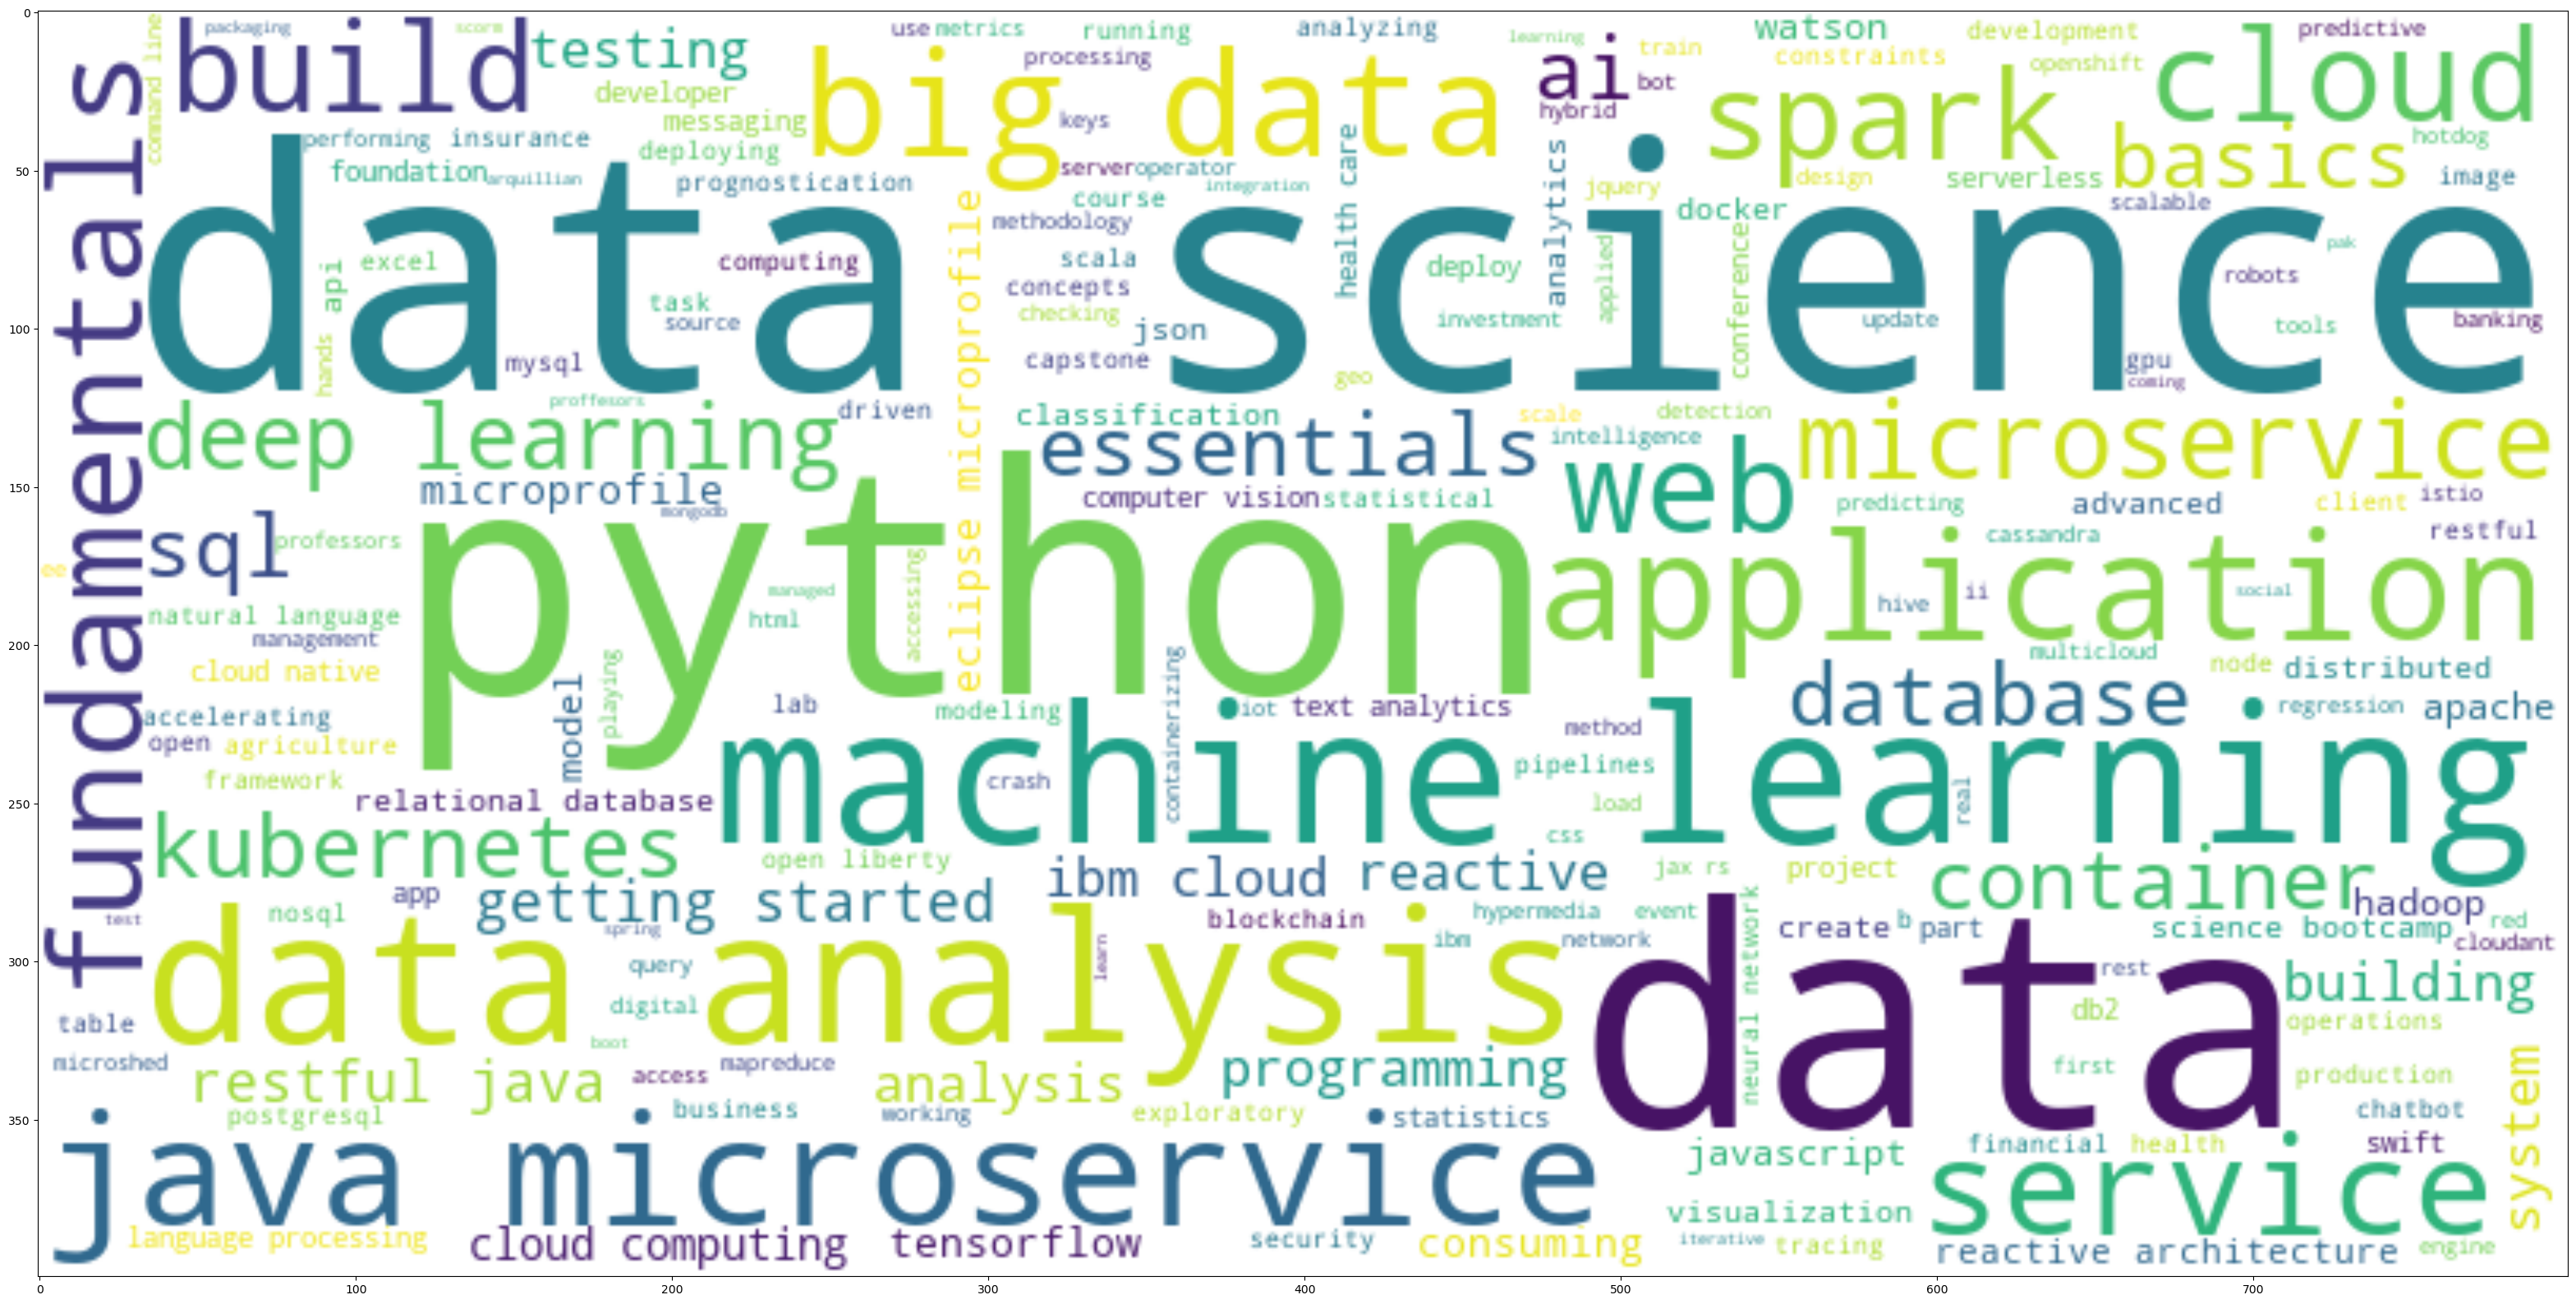

In [14]:
plt.axis("off")
plt.figure(figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

As we can see from the ```wordcloud```,  there are many popular IT related keywords such as python, data science, machine learning, big data, ai, tensorflow, container, cloud, etc. By looking at these keywords, we should have a general understanding that the courses in the dataset are focused on demanding IT skills.

Next, you need to perform some more detailed analysis on the course dataset.


### Analyze Course Genres

First, you can try to find out which courses may be of interest you. For example, what are the all machine learning related courses?

 Find all courses with genre `MachineLearning` == 1_

In [15]:
course_df['MachineLearning'] == 1

0      False
1       True
2      False
3      False
4      False
       ...  
302    False
303    False
304    False
305    False
306    False
Name: MachineLearning, Length: 307, dtype: bool

all courses with genres `MachineLearning` == 1 and `BigData` == 1_


In [16]:
course_df['BigData'] == 1

0      False
1      False
2      False
3       True
4      False
       ...  
302    False
303    False
304    False
305    False
306    False
Name: BigData, Length: 307, dtype: bool

In [17]:
genres = course_df.columns[2:]
genres

Index(['Database', 'Python', 'CloudComputing', 'DataAnalysis', 'Containers',
       'MachineLearning', 'ComputerVision', 'DataScience', 'BigData',
       'Chatbot', 'R', 'BackendDev', 'FrontendDev', 'Blockchain'],
      dtype='object')

Given all the course genres, now let's calculate the course count for each genre. e.g., there are 69 courses that belong to the `MachineLearning` genre and 23 courses that belong to the `Python` genre. We also want to sort the genre count list to find the most popular course genres.

Use the Pandas dataframe sum() and sort_values() methods to genreate a sorted course count per genre. You may also implement the task with different solutions_


In [18]:
genre_sums = course_df[genres].sum(axis=0)

In [19]:
df = pd.DataFrame(genre_sums, columns = ['Count']).sort_values(by = "Count", ascending=False)
df

,Count
BackendDev,78
MachineLearning,69
Database,60
DataAnalysis,56
DataScience,38
CloudComputing,37
BigData,36
Python,28
FrontendDev,19
Containers,17


We can also vsiaulize course genre counts using a bar chart:
Use seaborn barplot or other plot methods to plot course genre counts using a barchart. The x-axis is the course genre and the y-axis is the course count per genre._


/tmp/ipykernel_6606/1672398605.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=df.index, y=df['Count'], palette = 'magma')


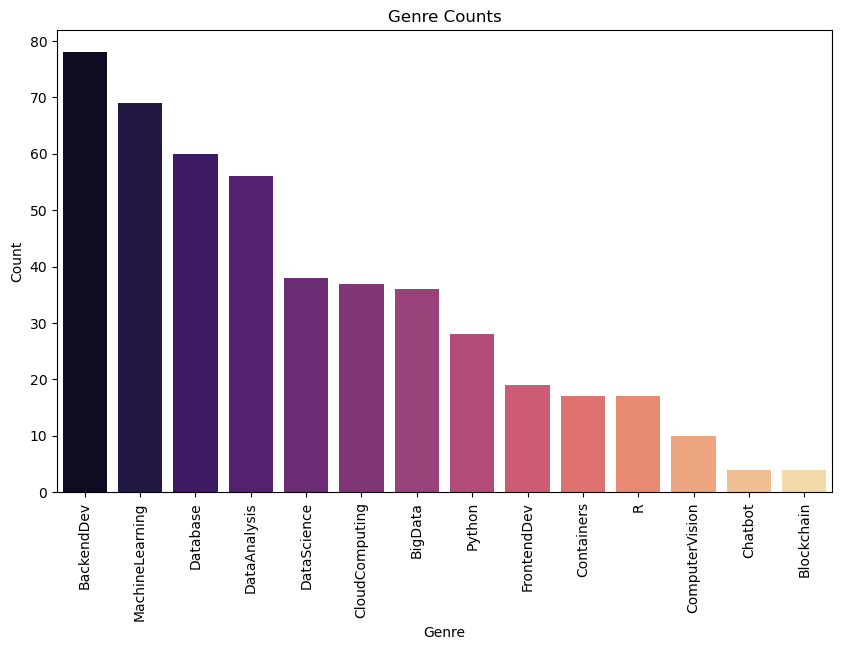

In [20]:
plt.figure(figsize=(10,6))
sb.barplot(x=df.index, y=df['Count'], palette = 'magma')
plt.title('Genre Counts')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

Now, you should have some solid understanding about all course metadata including the keywords in titles and popular course genres. Next, we will switch gears to exploring course learners related datasets.

### Analyze Course Enrollments

Let's first take a look at the course enrollments dataset.


In [21]:
ratings_df.head()

,user,item,rating
0,1889878,CC0101EN,3.0
1,1342067,CL0101EN,3.0
2,1990814,ML0120ENv3,3.0
3,380098,BD0211EN,3.0
4,779563,DS0101EN,3.0


This dataset contains three colums, `user` representing a unique user id, `item` representing a course id, and `rating` representing a course enrollment mode.

In an online learning scenario, we have learners or students as users who enrolled courses. In fact, to follow the standard recommender system naming convention, we call each learner as a `user`, each course an `item`, and the enrollment mode or interaction as `rating`. So that's why we have columns named `user`, `item`, and `rating` instead of using `learner`, `course`, and `enrollment`.

In this project, we may use these terms interchangeably.


In [22]:
ratings_df['rating'].unique()

array([3., 2.])

The rating column contains one of two values: `2` means the user just audited the course without completing it and `3` means the user completed the course and earned a certificate.
Two other possible values are not explicitly available in this project: `0` or `NA` means the user has no interaction with the course and `1` means the user just browsed the course.

Let's see how many ratings/enrollment we have in the dataset:


In [23]:
ratings_df.shape[0]

233306

We have 233306 enrollments. In fact, each user is likely to interact with multiple items so let's find the rating counts for each user:

Apply Pandas' groupby() and size() method on the user column to aggregate the rating count for each user, then report the total number of users after aggregation._


In [24]:
ratings_agg = ratings_df.groupby('user').size()

After the aggregation, you should get a new dataframe showing the rating count for each user. For example, user 4 rated 44 items and user 2 rated 61 items. Next, let's try to get some summary statistics and visualizations from the user ratings count dataframe.

Use describe() to report the statistics summary of the user enrollments._

In [25]:
ratings_agg.describe()

count    33901.000000
mean         6.881980
std          5.823548
min          1.000000
25%          2.000000
50%          6.000000
75%          9.000000
max         61.000000
dtype: float64

We can also get a histogram showing the enrollment distributions, e.g., how many users rated just 1 item or how many rated 10 items, etc.

Plot the histogram of user rating counts._


<Axes: ylabel='Count'>

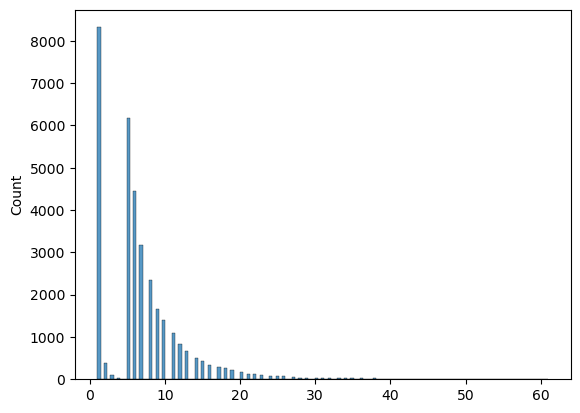

In [26]:
sb.histplot(ratings_agg,legend=False)

### Find the Top-20 Most Popular Courses

Now we know how many items each user rated. Let's see the most popular 20 courses, i.e., items with the most rating counts.
 Use Pandas groupby() and size() methods on the item column to aggregate the rating count for each item, then use the sort_values() method to sort the course enrollment count, and use the slice method to get the top 20 courses. You may also implement this task with different solutions_


In [27]:
ratings_df = ratings_df.groupby(['item']).size().reset_index().rename(columns={0:'Ratings'}).sort_values(by='Ratings', ascending=False).reset_index(drop=True)
ratings_df.head(20)

,item,Ratings
0,PY0101EN,14936
1,DS0101EN,14477
2,BD0101EN,13291
3,BD0111EN,10599
4,DA0101EN,8303
5,DS0103EN,7719
6,ML0101ENv3,7644
7,BD0211EN,7551
8,DS0105EN,7199
9,BC0101EN,6719


Now you may only see the item IDs which do not indicate what kind of courses they are. To make it more clear, we need to join the course titles in the course metadata dataset (`course_df`) so that we can identify what the most popular courses are immediately:

Use Pandas merge() method to join the course_df (contains the course title column)._


In [28]:
# Merge ratings_df with course_df
merged_df = pd.merge(ratings_df, course_df[['COURSE_ID', 'TITLE']], how='left', left_on='item', right_on='COURSE_ID')

# Select only the 'TITLE' and 'Ratings' columns
popular_courses = merged_df[['TITLE', 'Ratings']]

popular_courses.head(20)

,TITLE,Ratings
0,python for data science,14936
1,introduction to data science,14477
2,big data 101,13291
3,hadoop 101,10599
4,data analysis with python,8303
5,data science methodology,7719
6,machine learning with python,7644
7,spark fundamentals i,7551
8,data science hands on with open source tools,7199
9,blockchain essentials,6719



It seems that those popular courses take a huge amount of total ratings. Let's find the exact percentage.


In [30]:
# Get the total course enrollments again
total = ratings_df.shape[0]
total

126

Get the percentage of the top-20 course enrollments._


In [37]:
top = 20


In [32]:
# Calculate total enrollments
total_enrollments = popular_courses['Ratings'].sum()

# Get the top 20 courses
top_20_courses = popular_courses.nlargest(20, 'Ratings')

# Calculate the enrollments for the top 20 courses
top_20_enrollments = top_20_courses['Ratings'].sum()

# Calculate the percentage
percentage = (top_20_enrollments / total_enrollments) * 100

percentage

63.30227255192751

In [38]:
print(f"Percentage of the top course enrollments {round((top * 100)/total, 2)}%")

Percentage of the top course enrollments 15.87%
